In [1]:
import tensorflow as tf
from keras import datasets, layers, models, preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
#converting to 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

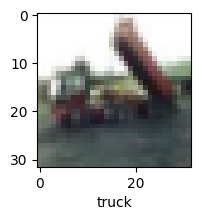

In [9]:
plot_sample(X_train, y_train, 2)

Normalizing the training data

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

CNN model

In [14]:
cnn = models.Sequential([
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=40, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=80, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(.25),

    layers.BatchNormalization(),
    layers.Conv2D(filters=160, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model_history = cnn.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 44s 106ms/step - loss: 1.3523 - accuracy: 0.5152 - val_loss: 1.5367 - val_accuracy: 0.4642
Epoch 2/10
391/391 [==============================] - 45s 115ms/step - loss: 1.0000 - accuracy: 0.6496 - val_loss: 0.8976 - val_accuracy: 0.6815
Epoch 3/10
391/391 [==============================] - 41s 105ms/step - loss: 0.8468 - accuracy: 0.7048 - val_loss: 0.8186 - val_accuracy: 0.7127
Epoch 4/10
391/391 [==============================] - 44s 113ms/step - loss: 0.7498 - accuracy: 0.7389 - val_loss: 0.7679 - val_accuracy: 0.7324
Epoch 5/10
391/391 [==============================] - 45s 115ms/step - loss: 0.6805 - accuracy: 0.7616 - val_loss: 0.7201 - val_accuracy: 0.7510
Epoch 6/10
391/391 [==============================] - 45s 114ms/step - loss: 0.6187 - accuracy: 0.7820 - val_loss: 0.7165 - val_accuracy: 0.7528
Epoch 7/10
391/391 [==============================] - 44s 111ms/step - loss: 0.5641 - accuracy: 0.8034 - val_loss: 0.6775 - val_ac

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.6729 - accuracy: 0.7790


[0.6729245781898499, 0.7789999842643738]

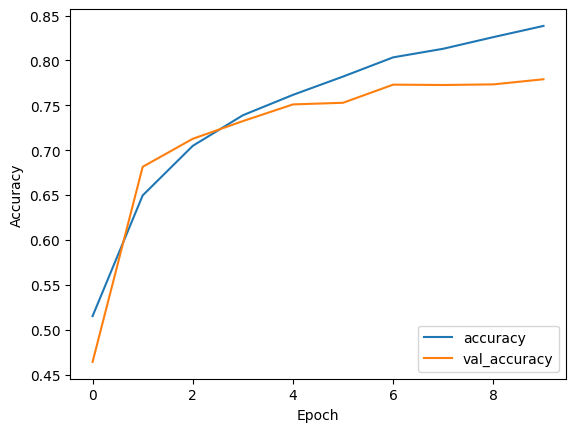

In [18]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

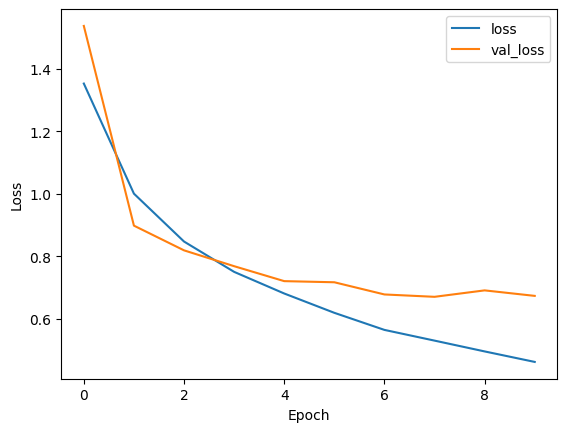

In [19]:
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

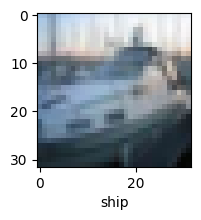

In [20]:
plot_sample(X_test, y_test, 2)

In [21]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 3s 10ms/step


In [22]:
classes[y_pred_classes[2]]

'ship'

In [23]:
#predictions
print(y_pred_classes[:5])

#actual values
print(y_test[:5])

[3, 8, 8, 0, 6]
[3 8 8 0 6]


In [24]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1000
           1       0.91      0.83      0.87      1000
           2       0.75      0.67      0.71      1000
           3       0.67      0.58      0.62      1000
           4       0.76      0.79      0.77      1000
           5       0.71      0.71      0.71      1000
           6       0.86      0.83      0.84      1000
           7       0.79      0.82      0.81      1000
           8       0.74      0.92      0.82      1000
           9       0.78      0.89      0.83      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

